### Task 1: Data Cleaning and Preprocessing
#### Load the dataset using pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(r"D:\Shrabani.Personal\Data Science Course\Assignment\Walmart Project\Walmart DataSet.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [4]:
df.shape

(6435, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


#### Identify and handle missing values (e.g., imputation or removal)

In [7]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
df.duplicated().sum()

0

#### standardize inconsistent data formats (e.g., date formats)

In [10]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


### Exploratory Data Analysis (EDA)
#### Calculate summary statistics (mean, median, mode,standard deviation)


In [13]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


#### Average Weekly Sales per Stores

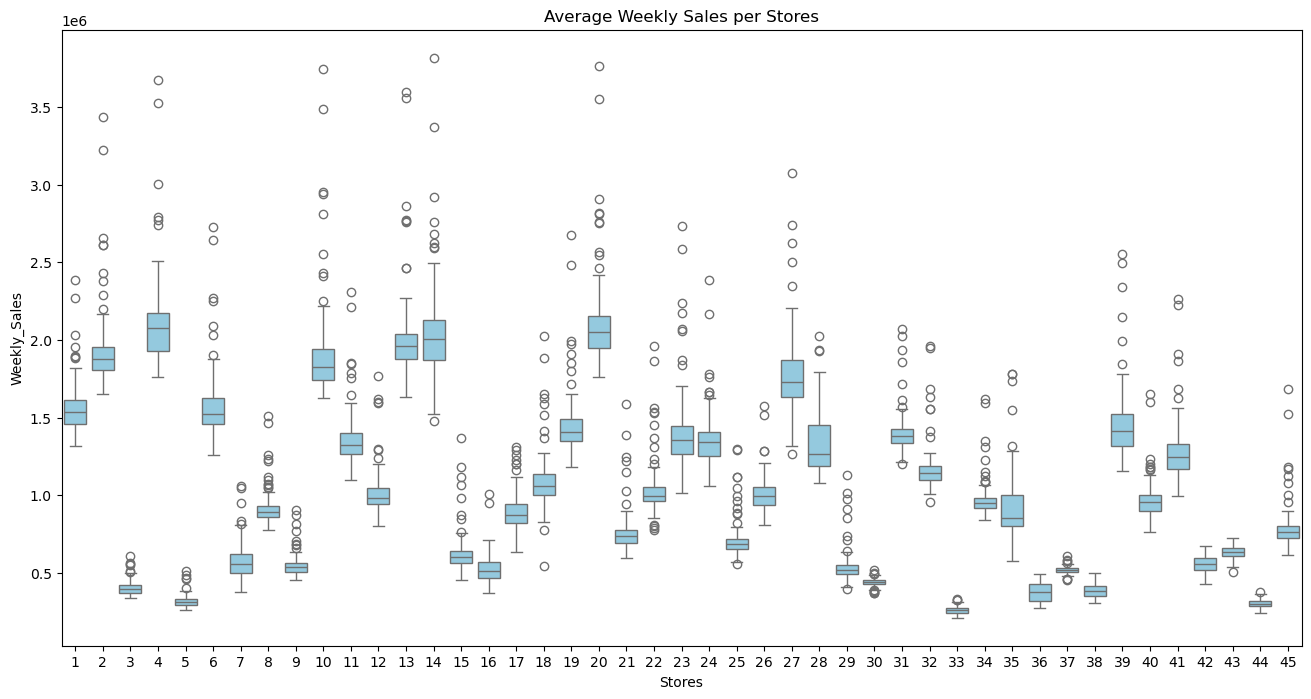

In [15]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Store', y='Weekly_Sales', color='skyblue')
plt.title("Average Weekly Sales per Stores")
plt.xlabel('Stores')
plt.ylabel('Weekly_Sales')
plt.show()

#### Observation
1. Overall Pattern

The average weekly sales vary significantly across stores, indicating differing performance levels and possibly varying customer bases, locations, or store sizes.

Some stores consistently outperform others, suggesting potential regional or operational factors.

2. Top Performing Stores

The highest average weekly sales are observed in Store 20 (≈ 2.11M), Store 4 (≈ 2.09M), Store 14 (≈ 2.02M), and Store 13 (≈ 2.00M).

These stores are likely located in high-demand or densely populated areas, or may have a larger product variety.

3. Moderate Performers

Stores like 1, 6, 10, 19, 23, 31, 32, and 41 show moderate averages, roughly between 1.2M to 1.6M, suggesting stable but not top-tier performance.

#### Distribution of Weekly Fuel Prices

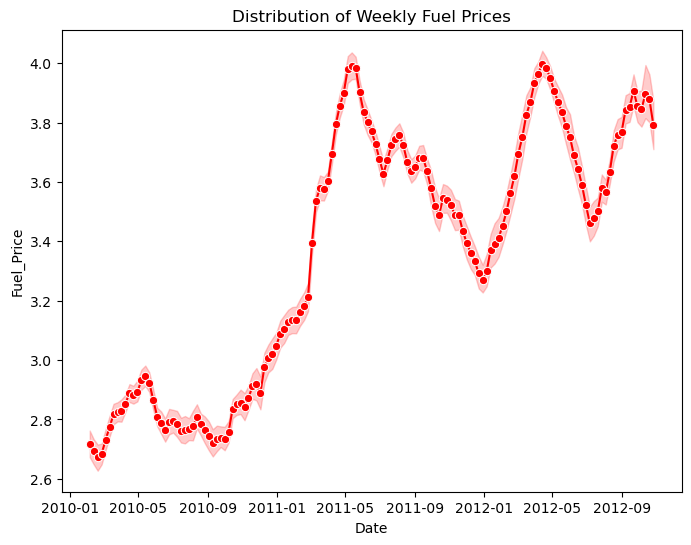

In [18]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df, x='Date', y='Fuel_Price', marker='o', color='r')
plt.title("Distribution of Weekly Fuel Prices")
plt.xlabel('Date')
plt.ylabel('Fuel_Price')
plt.show()


#### Observation
The fuel price trend shows that prices were relatively low at the beginning of the observed period. Over time, fuel prices gradually increased, with occasional short-term declines. Notably, there were significant peaks around May 2011 and May 2012, indicating periods of higher fuel costs during those months. Overall, the distribution reflects a general upward trend with periodic fluctuations in fuel prices over time.

#### Total Weekly Sales Over Time

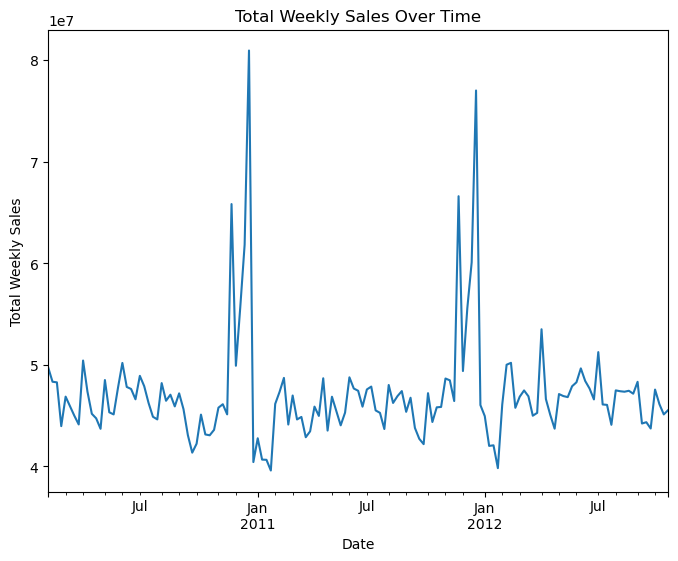

In [21]:
plt.figure(figsize=(8,6))
df.groupby('Date')['Weekly_Sales'].sum().plot()
plt.title("Total Weekly Sales Over Time")
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.show()

#### Observation
The total weekly sales show a fluctuating pattern from early 2010 to late 2012, generally ranging between 43–49 million per week.

Sales start around 48–49 million in early 2010 and experience week-to-week variations.

There is a notable increase at the end of December, likely due to holiday shopping and seasonal demand.

Other fluctuations throughout the year may correspond to promotions, holidays, or regional events.

Overall, the trend shows relative stability with predictable seasonal peaks, especially during the year-end period.

#### Impact of Holidays on Average Weekly Sales

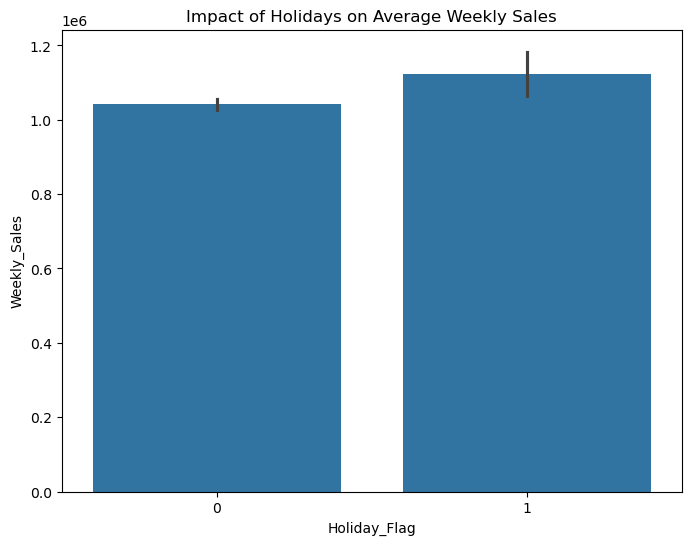

In [24]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='Holiday_Flag', y='Weekly_Sales')
plt.title("Impact of Holidays on Average Weekly Sales")
plt.xlabel('Holiday_Flag')
plt.ylabel('Weekly_Sales')
plt.show()

In [25]:
df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

#### Observation
The average weekly sales during non-holiday weeks (Holiday_Flag = 0) is approximately 1.04 million.

The average weekly sales during holiday weeks (Holiday_Flag = 1) is approximately 1.12 million.

This indicates that weekly sales are higher during holiday weeks compared to non-holiday weeks.
Specifically, there is about a 7.9% increase in average weekly sales during holidays.



#### Top Performing Store by Total Sales

In [28]:
store_TotalSales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)
store_TotalSales 

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
Name: Weekly_Sales, dtype: float64

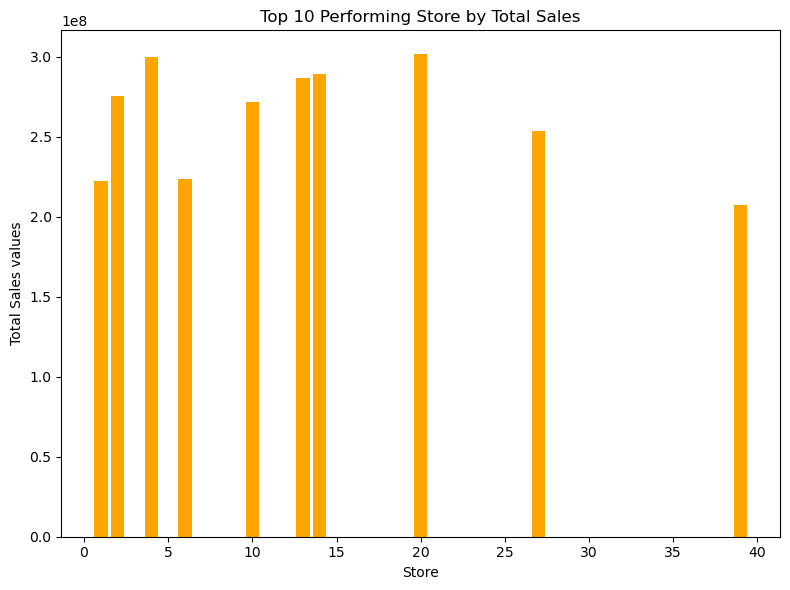

In [29]:
plt.figure(figsize=(8,6))
plt.bar(store_TotalSales.index, store_TotalSales.values, color='orange')
plt.title('Top 10 Performing Store by Total Sales')
plt.xlabel('Store')
plt.ylabel('Total Sales values')
plt.tight_layout()
plt.show()


#### Observation
The top-performing store is Store 20, with total sales of approximately 301.4 million.

It is closely followed by Store 4 (299.5 million) and Store 14 (289.9 million).

The lowest among the top 10 is Store 39, with total sales of about 207.4 million.

The difference between the highest (Store 20) and the lowest (Store 39) within the top 10 is around 94 million, showing noticeable variation even among the best-performing stores.


#### Distribution of Consumer Price Index (CPI) Values

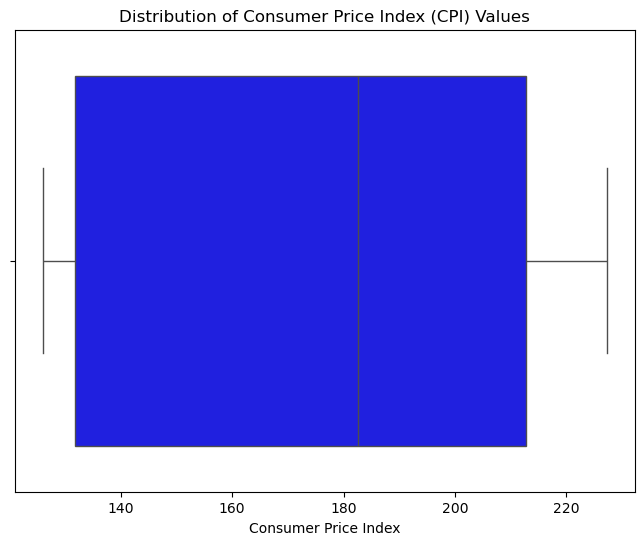

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='CPI', color='blue')
plt.title("Distribution of Consumer Price Index (CPI) Values")
plt.xlabel('Consumer Price Index')
plt.show()


#### Observation
The distribution of Consumer Price Index (CPI) values shows that most of the data is concentrated in the lower to mid-range, with the 25th percentile around 131.7 and the 75th percentile around 212.7, indicating that the central 50% of CPI values lie within this range. There are relatively few extreme values beyond this range, suggesting that CPI generally increases gradually over time. Overall, the distribution reflects a steady upward trend in prices, with a small number of high CPI values representing peak periods.

#### Correlation Heatmap

In [35]:
df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000000,-0.063810,0.009464,-0.072634,-0.106176
Temperature,-0.063810,1.000000,0.144982,0.176888,0.101158
Fuel_Price,0.009464,0.144982,1.000000,-0.170642,-0.034684
CPI,-0.072634,0.176888,-0.170642,1.000000,-0.302020
Unemployment,-0.106176,0.101158,-0.034684,-0.302020,1.000000


#### Observation
Weekly_Sales shows a negative correlation with Temperature (-0.25) — sales may decrease when temperatures are higher.

There’s a weak negative correlation with Unemployment (-0.30) — higher unemployment tends to slightly reduce weekly sales.

Other variables like Fuel_Price and CPI show weak or no correlation, suggesting limited short-term impact.

#### Effect of Temperature on Weekly Sales

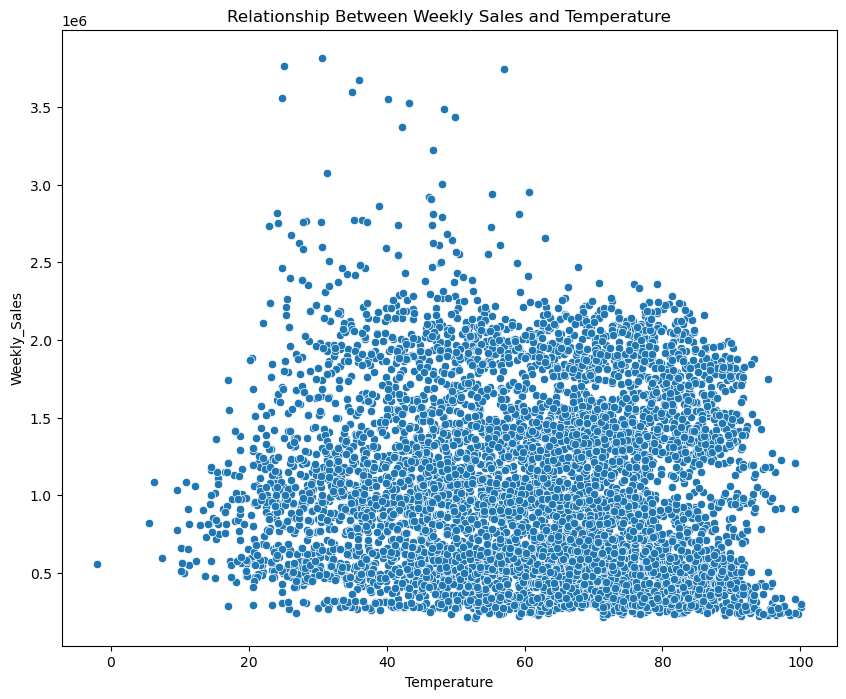

In [38]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales')
plt.title("Relationship Between Weekly Sales and Temperature")
plt.xlabel('Temperature')
plt.ylabel('Weekly_Sales')
plt.show()

#### Effect of Unemployment on Weekly Sales

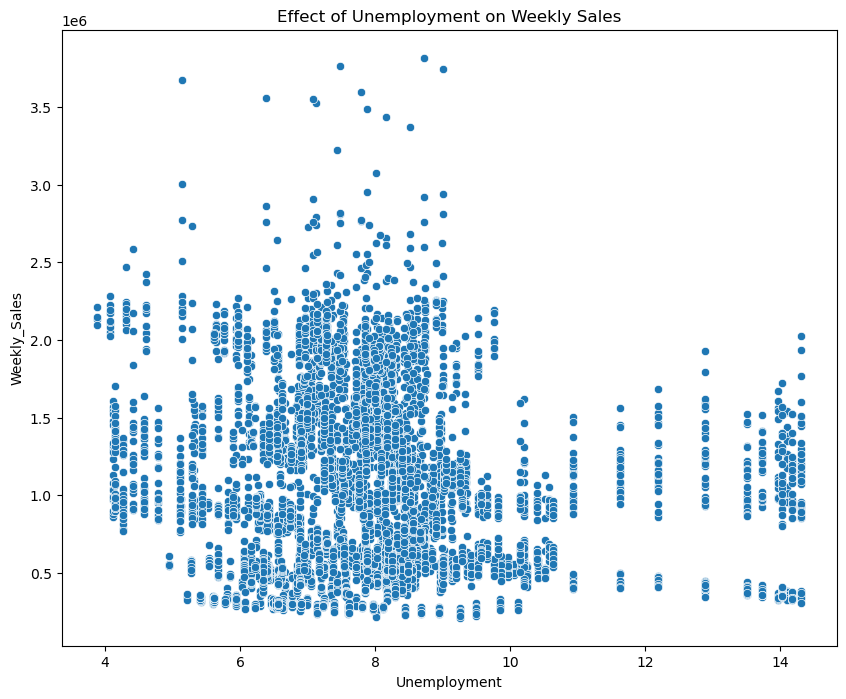

In [40]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Unemployment', y='Weekly_Sales')
plt.title("Effect of Unemployment on Weekly Sales")
plt.xlabel('Unemployment')
plt.ylabel('Weekly_Sales')
plt.show()

### Q1:  a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [42]:
store_corr=df.groupby('Store')[['Weekly_Sales', 'Unemployment']].corr().iloc[0::2, -1].sort_values().head()
store_corr

Store              
38     Weekly_Sales   -0.785290
44     Weekly_Sales   -0.780076
39     Weekly_Sales   -0.384681
42     Weekly_Sales   -0.356355
41     Weekly_Sales   -0.350630
Name: Unemployment, dtype: float64

#### Yes, the weekly sales are affected by the unemployment rate and Store no. 38 is suffering most.

### Q1:b. If the weekly sales show a seasonal trend, when and what could be the reason?

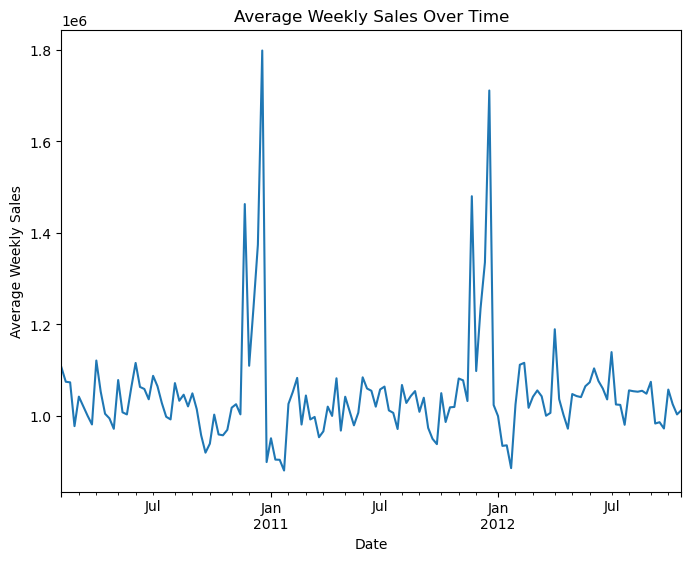

In [45]:
plt.figure(figsize=(8,6))
df.groupby('Date')['Weekly_Sales'].mean().plot()
plt.title("Average Weekly Sales Over Time")
plt.xlabel('Date')
plt.ylabel('Average Weekly Sales')
plt.show()

### Observation: Impact of Holiday Season on Weekly Sales

The average weekly sales increase noticeably from the end of November to December, coinciding with the holiday season.

This suggests that holidays drive higher customer spending, leading to a peak in sales compared to regular weeks.

### Q1.c. Does temperature affect the weekly sales in any manner?

In [48]:
df[['Temperature', 'Weekly_Sales']].corr()	

,Temperature,Weekly_Sales
Temperature,1.00000,-0.06381
Weekly_Sales,-0.06381,1.00000


### Observation: Relationship Between Temperature and Weekly Sales

The correlation between Temperature and Weekly Sales is approximately -0.064.

This value is very close to 0, indicating almost no linear relationship between temperature and weekly sales.

In other words, changes in temperature do not appear to significantly affect weekly sales in this dataset.

### Q1.d. How is the Consumer Price index affecting the weekly sales of various stores?

In [51]:
df[['CPI', 'Weekly_Sales']].corr()	

,CPI,Weekly_Sales
CPI,1.000000,-0.072634
Weekly_Sales,-0.072634,1.000000


In [52]:
store_corr= df.groupby('Store')[['CPI', 'Weekly_Sales']].corr().iloc[0::2, -1]
store_corr

Store     
1      CPI    0.225408
2      CPI   -0.062431
3      CPI    0.317250
4      CPI    0.351157
5      CPI    0.308261
6      CPI   -0.011357
7      CPI    0.289044
8      CPI    0.120255
9      CPI    0.294805
10     CPI   -0.115374
11     CPI    0.069781
12     CPI    0.084087
13     CPI    0.163976
14     CPI   -0.419755
15     CPI   -0.174467
16     CPI    0.124285
17     CPI    0.348571
18     CPI   -0.193541
19     CPI   -0.155341
20     CPI    0.058706
21     CPI   -0.163649
22     CPI   -0.038602
23     CPI    0.084248
24     CPI   -0.013684
25     CPI   -0.010914
26     CPI    0.131980
27     CPI   -0.213082
28     CPI   -0.095908
29     CPI   -0.072530
30     CPI   -0.298188
31     CPI    0.132887
32     CPI    0.196782
33     CPI   -0.052271
34     CPI    0.115437
35     CPI   -0.424107
36     CPI   -0.915095
37     CPI    0.244507
38     CPI    0.812837
39     CPI    0.428043
40     CPI    0.113318
41     CPI    0.392293
42     CPI    0.360859
43     CPI   -0.285686


In [53]:
store_corr=store_corr.sort_values(ascending=True)
store_corr

Store     
36     CPI   -0.915095
35     CPI   -0.424107
14     CPI   -0.419755
30     CPI   -0.298188
43     CPI   -0.285686
27     CPI   -0.213082
18     CPI   -0.193541
15     CPI   -0.174467
21     CPI   -0.163649
19     CPI   -0.155341
10     CPI   -0.115374
28     CPI   -0.095908
29     CPI   -0.072530
2      CPI   -0.062431
33     CPI   -0.052271
22     CPI   -0.038602
45     CPI   -0.023548
24     CPI   -0.013684
6      CPI   -0.011357
25     CPI   -0.010914
20     CPI    0.058706
11     CPI    0.069781
12     CPI    0.084087
23     CPI    0.084248
40     CPI    0.113318
34     CPI    0.115437
8      CPI    0.120255
16     CPI    0.124285
26     CPI    0.131980
31     CPI    0.132887
13     CPI    0.163976
32     CPI    0.196782
1      CPI    0.225408
37     CPI    0.244507
7      CPI    0.289044
9      CPI    0.294805
5      CPI    0.308261
3      CPI    0.317250
17     CPI    0.348571
4      CPI    0.351157
42     CPI    0.360859
41     CPI    0.392293
39     CPI    0.428043


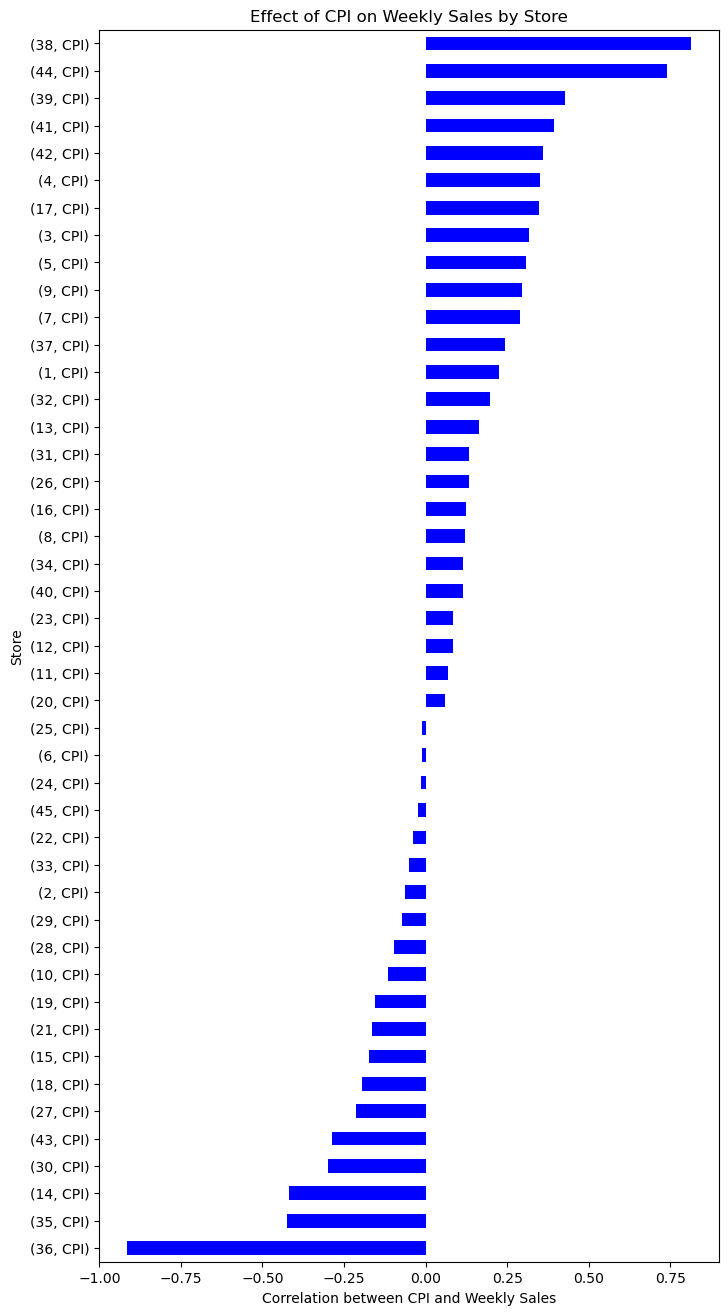

In [54]:
plt.figure(figsize=(8,16))
store_corr.plot(kind='barh', color='blue')
plt.title('Effect of CPI on Weekly Sales by Store')
plt.xlabel('Correlation between CPI and Weekly Sales')
plt.ylabel('Store')
plt.show()

### Q1.e. Top performing stores according to the historical data.

In [56]:
TopStore =df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
TopStore

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
23    1.987506e+08
24    1.940160e+08
11    1.939628e+08
28    1.892637e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
12    1.442872e+08
26    1.434164e+08
34    1.382498e+08
40    1.378703e+08
35    1.315207e+08
8     1.299512e+08
17    1.277821e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
43    9.056544e+07
15    8.913368e+07
7     8.159828e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
38    5.515963e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
Name: Weekly_Sales, dtype: float64

In [57]:
Top_store=TopStore.head(1)
Top_store

Store
20    3.013978e+08
Name: Weekly_Sales, dtype: float64

### Q1.f.The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [59]:
worst_store=df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=True).head(1)
worst_store

Store
33    37160221.96
Name: Weekly_Sales, dtype: float64

In [60]:
diff = Top_store.values -worst_store.values
diff

array([2.6423757e+08])

#### The difference between the the highest and lowest performing stores based on the total weekly sales values is 2.6423757e+08.

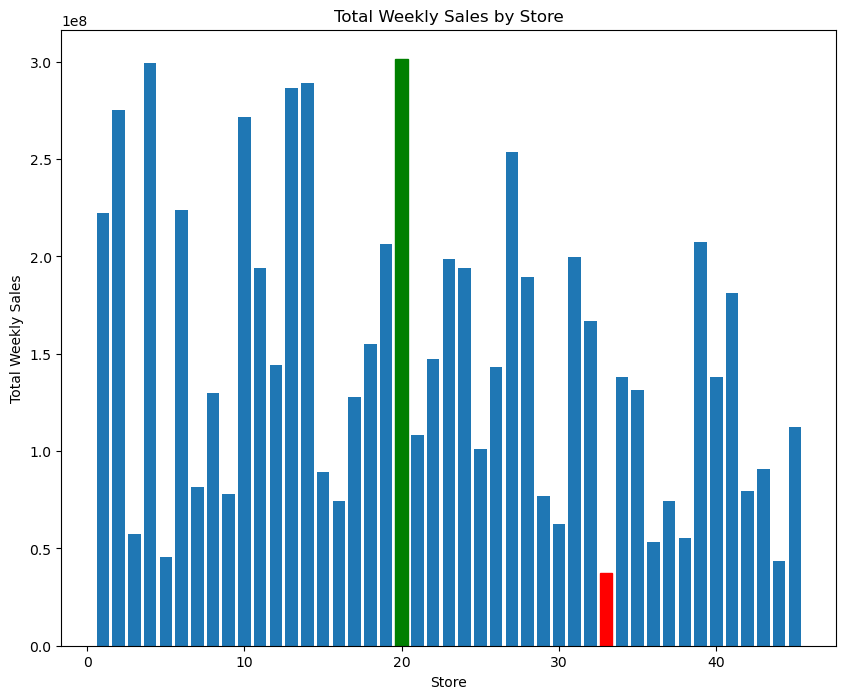

In [62]:
plt.figure(figsize=(10,8))
bars=plt.bar(TopStore.index, TopStore.values)
bars[0].set_color('green')   # highest
bars[-1].set_color('red')    # lowest

plt.title('Total Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')

plt.show()

###  2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [65]:
df.index=df['Date']
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,,
2010-02-05,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [66]:
df.drop(columns=['Date'], inplace=True)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106


### Company-Wide Weekly Sales: Time Series Analysis

In [68]:
df=df.groupby(pd.Grouper(freq ='W')).sum()
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-07,1035,49750740.50,0,1531.68,122.303,7547.889822,387.869
2010-02-14,1035,48336677.63,45,1536.81,121.231,7552.152354,387.869
2010-02-21,1035,48276993.78,0,1697.39,120.243,7554.225875,387.869
2010-02-28,1035,43968571.13,0,1765.96,120.777,7555.934559,387.869
2010-03-07,1035,46871470.30,0,1931.28,122.904,7557.643245,387.869


In [69]:
df.shape

(143, 7)

<Axes: xlabel='Date'>

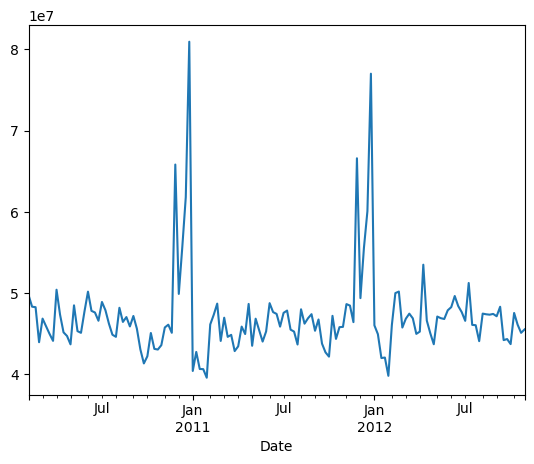

In [70]:
df['Weekly_Sales'].plot()

#### Stationary Analysis

In [72]:
from statsmodels.tsa.stattools import adfuller
result= adfuller(df['Weekly_Sales'])
result[1] ##this is the p_value of adfuller test

2.675979158986003e-07

####  If the p-value is less than 0.05, then the data is Stationary, otherwise data is non-Stationary. 
#### It is stationary data.

#### Seasonal decomposition of the Weekly_Sales column

In [75]:
df_train =df[0:115]
df_test=df[115:]
df_train

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-07,1035,49750740.50,0,1531.68,122.303,7547.889822,387.869
2010-02-14,1035,48336677.63,45,1536.81,121.231,7552.152354,387.869
2010-02-21,1035,48276993.78,0,1697.39,120.243,7554.225875,387.869
2010-02-28,1035,43968571.13,0,1765.96,120.777,7555.934559,387.869
2010-03-07,1035,46871470.30,0,1931.28,122.904,7557.643245,387.869
...,...,...,...,...,...,...,...
2012-03-18,1035,46901504.94,0,2463.40,172.234,7882.307170,337.875
2012-03-25,1035,44993794.45,0,2571.31,174.078,7886.016132,337.875
2012-04-01,1035,45272862.02,0,2588.78,177.010,7889.725093,337.875


In [76]:
df_test

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2012-04-22,1035,45072529.78,0,2761.00,179.293,7898.653881,333.879
2012-04-29,1035,43716798.89,0,2824.93,177.791,7900.164747,333.879
2012-05-06,1035,47124197.93,0,2910.42,175.804,7901.675612,333.879
2012-05-13,1035,46925878.99,0,2917.71,174.136,7903.186478,333.879
2012-05-20,1035,46823939.22,0,3043.72,172.549,7903.230078,333.879
2012-05-27,1035,47892463.31,0,3230.80,170.477,7902.686772,333.879
2012-06-03,1035,48281649.72,0,3282.47,168.787,7902.143467,333.879
2012-06-10,1035,49651171.78,0,3239.61,166.022,7901.600161,333.879
2012-06-17,1035,48412110.70,0,3377.09,164.019,7901.469082,333.879


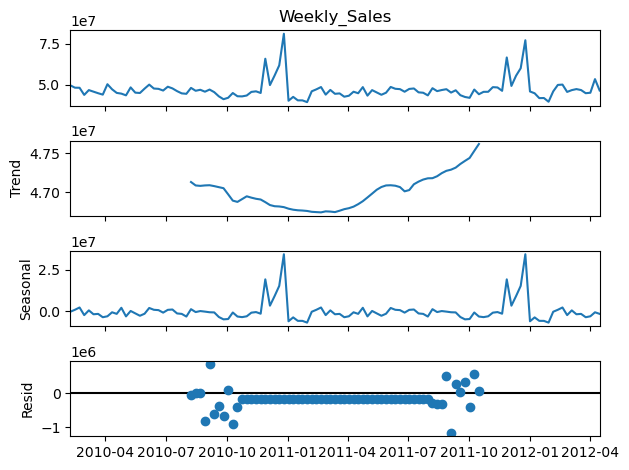

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_results = seasonal_decompose(df_train['Weekly_Sales'])
decompose_results.plot();

#### Autocorrelation Plots

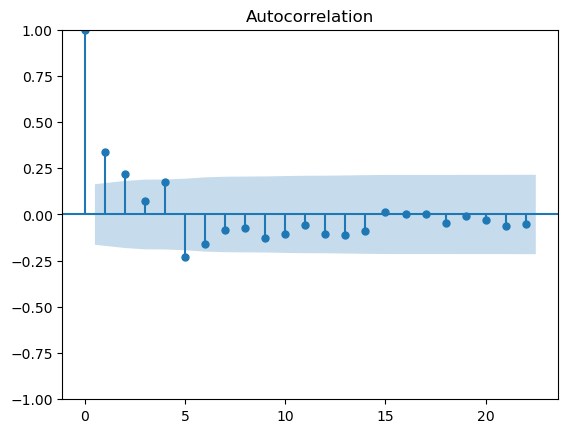

In [79]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Weekly_Sales']);

#### Partial autocorrelation plot

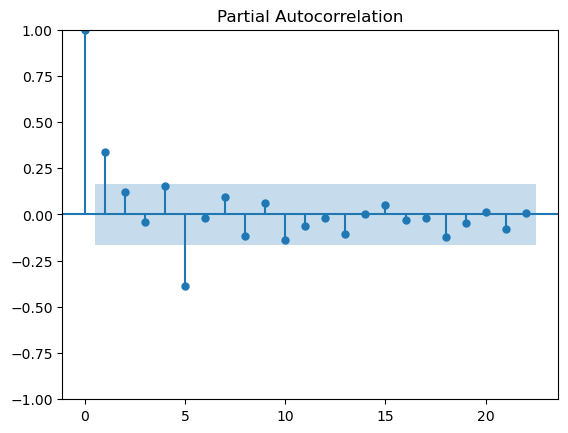

In [81]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Weekly_Sales']);

#### AutoRegressive Models

#### Auto Regressive Method

In [83]:
from statsmodels.tsa.arima.model import ARIMA
# Identify your features (exogenous variables)
exog_cols = ['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'] 
# Ensure df has these columns indexed to the date/time

ar_model = ARIMA(
    df['Weekly_Sales'],       # The target variable
    exog=df[exog_cols],       # The powerful external features
    order=(1, 0, 0))
ar_model = ar_model.fit()

In [84]:
train_len=115
ar_model_preds = ar_model.predict(start = train_len, end = len(df)-1)
ar_model_preds

Date
2012-04-22    4.663899e+07
2012-04-29    4.645591e+07
2012-05-06    4.631748e+07
2012-05-13    4.731474e+07
2012-05-20    4.727796e+07
2012-05-27    4.727738e+07
2012-06-03    4.762775e+07
2012-06-10    4.799572e+07
2012-06-17    4.833968e+07
2012-06-24    4.823636e+07
2012-07-01    4.829362e+07
2012-07-08    4.623532e+07
2012-07-15    4.772894e+07
2012-07-22    4.643981e+07
2012-07-29    4.605173e+07
2012-08-05    4.574400e+07
2012-08-12    4.616341e+07
2012-08-19    4.601386e+07
2012-08-26    4.625822e+07
2012-09-02    4.628321e+07
2012-09-09    4.850117e+07
2012-09-16    4.626468e+07
2012-09-23    4.589615e+07
2012-09-30    4.643558e+07
2012-10-07    4.335897e+07
2012-10-14    4.525809e+07
2012-10-21    4.487224e+07
2012-10-28    4.503603e+07
Freq: W-SUN, Name: predicted_mean, dtype: float64

In [85]:
ar_pred = pd.DataFrame({
    'Date': ar_model_preds.index, 
    'Weekly_Sales': ar_model_preds.values  # Assuming ar_model_preds has 12 values
})
ar_pred


,Date,Weekly_Sales
0,2012-04-22,4.663899e+07
1,2012-04-29,4.645591e+07
2,2012-05-06,4.631748e+07
3,2012-05-13,4.731474e+07
4,2012-05-20,4.727796e+07
5,2012-05-27,4.727738e+07
6,2012-06-03,4.762775e+07
7,2012-06-10,4.799572e+07
8,2012-06-17,4.833968e+07
9,2012-06-24,4.823636e+07


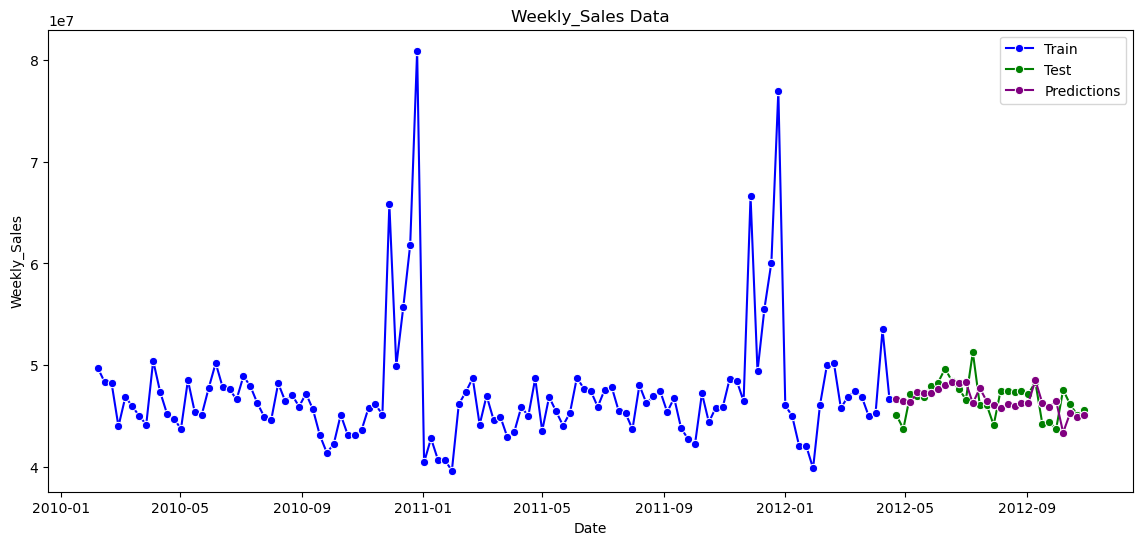

In [86]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_test, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(data=ar_pred, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Weekly_Sales Data');

In [87]:
## Import 'mean_squared_error' from 'sklearn' for error computations
from sklearn.metrics import mean_squared_error

# Summarize the performance of the model on the test data using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_true = df_test['Weekly_Sales'], y_pred = ar_pred['Weekly_Sales']))

rmse = np.round(rmse, 2)

performance_df = pd.DataFrame(index = [0],data = {'Model': 'AR', 'RMSE': rmse})

performance_df.set_index('Model', inplace = True)

performance_df

,RMSE
Model,
AR,1799834.98


#### Autoregressive integrated moving average (ARIMA) Method

In [89]:
# Identify your features (exogenous variables)
exog_cols = ['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'] 
# Ensure df has these columns indexed to the date/time

arima_model = ARIMA(
    df['Weekly_Sales'],       # The target variable
    exog=df[exog_cols],       # The powerful external features
    order=(1, 0, 1))

arima_model = arima_model.fit()

In [90]:
train_len = 115
arima_model_preds = arima_model.predict(start = train_len, end = len(df)-1)
arima_model_preds

Date
2012-04-22    4.707349e+07
2012-04-29    4.662497e+07
2012-05-06    4.628747e+07
2012-05-13    4.705590e+07
2012-05-20    4.720047e+07
2012-05-27    4.722782e+07
2012-06-03    4.756193e+07
2012-06-10    4.800316e+07
2012-06-17    4.838179e+07
2012-06-24    4.839121e+07
2012-07-01    4.839181e+07
2012-07-08    4.625419e+07
2012-07-15    4.753721e+07
2012-07-22    4.674767e+07
2012-07-29    4.611859e+07
2012-08-05    4.575068e+07
2012-08-12    4.598535e+07
2012-08-19    4.603523e+07
2012-08-26    4.636779e+07
2012-09-02    4.643741e+07
2012-09-09    4.866560e+07
2012-09-16    4.641889e+07
2012-09-23    4.598218e+07
2012-09-30    4.632834e+07
2012-10-07    4.319939e+07
2012-10-14    4.490961e+07
2012-10-21    4.500999e+07
2012-10-28    4.520953e+07
Freq: W-SUN, Name: predicted_mean, dtype: float64

In [91]:
arima_pred = pd.DataFrame({
    'Date': arima_model_preds.index, 
    'Weekly_Sales': arima_model_preds.values  # Assuming ar_model_preds has 12 values
})
arima_pred

,Date,Weekly_Sales
0,2012-04-22,4.707349e+07
1,2012-04-29,4.662497e+07
2,2012-05-06,4.628747e+07
3,2012-05-13,4.705590e+07
4,2012-05-20,4.720047e+07
5,2012-05-27,4.722782e+07
6,2012-06-03,4.756193e+07
7,2012-06-10,4.800316e+07
8,2012-06-17,4.838179e+07
9,2012-06-24,4.839121e+07


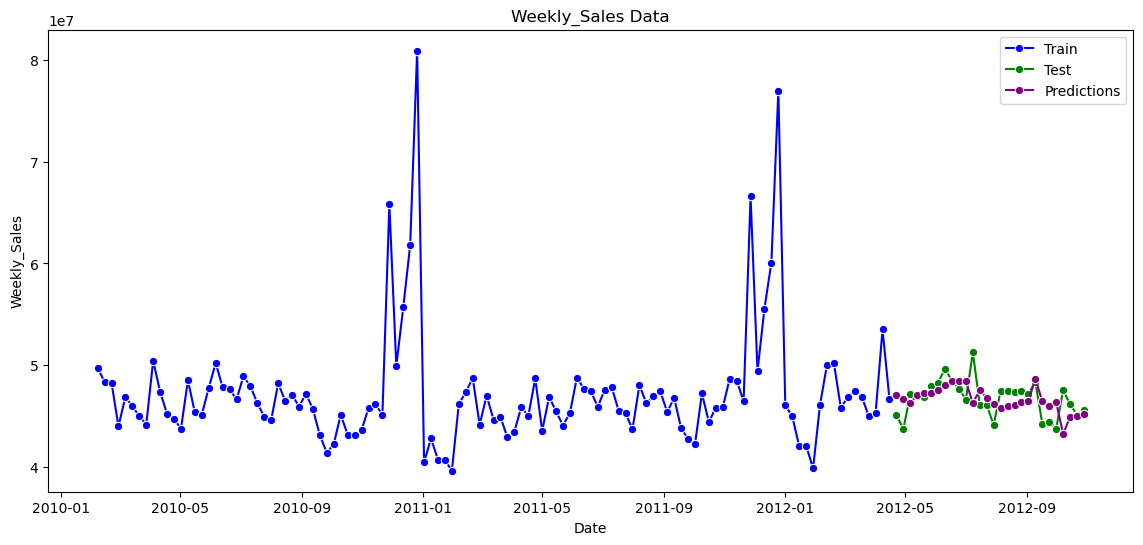

In [92]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_test, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(data=arima_pred, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Weekly_Sales Data');

In [93]:
# Summarize the performance of the model on the test data using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_true = df_test['Weekly_Sales'], y_pred = arima_pred['Weekly_Sales']))

rmse = np.round(rmse, 2)

performance_df_temp = pd.DataFrame(index = [0], data = {'Model': 'ARIMA', 'RMSE': rmse})

performance_df_temp.set_index('Model', inplace = True)

performance_df = pd.concat([performance_df, performance_df_temp])

performance_df

,RMSE
Model,
AR,1799834.98
ARIMA,1849550.37


#### SARIMA (Seasonal AutoRegressive Integrated Moving Average) Method


In [95]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Identify your features (exogenous variables)
exog_cols = ['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'] 
# Ensure df has these columns indexed to the date/time

sarima_model = SARIMAX(
    df['Weekly_Sales'],       # The target variable
    exog=df[exog_cols],       # The powerful external features
    order=(1, 0, 1), 
    seasonal_order=(1, 0, 1, 52) # Use 52 for weekly data!
).fit()

C:\Users\Shrabani P\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [96]:
# Obtain predictions from the SARIMA model for the testing data indices
train_len = 115
sarima_model_preds = sarima_model.predict(start = train_len, end = len(df)-1)
sarima_model_preds

Date
2012-04-22    4.907325e+07
2012-04-29    4.449001e+07
2012-05-06    4.685896e+07
2012-05-13    4.648983e+07
2012-05-20    4.563684e+07
2012-05-27    4.680225e+07
2012-06-03    4.931632e+07
2012-06-10    4.825938e+07
2012-06-17    4.837770e+07
2012-06-24    4.713200e+07
2012-07-01    4.834223e+07
2012-07-08    4.799108e+07
2012-07-15    4.745696e+07
2012-07-22    4.670280e+07
2012-07-29    4.528948e+07
2012-08-05    4.798964e+07
2012-08-12    4.661245e+07
2012-08-19    4.725718e+07
2012-08-26    4.774282e+07
2012-09-02    4.615397e+07
2012-09-09    4.803974e+07
2012-09-16    4.530433e+07
2012-09-23    4.410249e+07
2012-09-30    4.403513e+07
2012-10-07    4.706680e+07
2012-10-14    4.556658e+07
2012-10-21    4.653258e+07
2012-10-28    4.610639e+07
Freq: W-SUN, Name: predicted_mean, dtype: float64

In [97]:
Sarima_pred = pd.DataFrame({
    'Date': sarima_model_preds.index, 
    'Weekly_Sales': sarima_model_preds.values  # Assuming ar_model_preds has 12 values
})
Sarima_pred

,Date,Weekly_Sales
0,2012-04-22,4.907325e+07
1,2012-04-29,4.449001e+07
2,2012-05-06,4.685896e+07
3,2012-05-13,4.648983e+07
4,2012-05-20,4.563684e+07
5,2012-05-27,4.680225e+07
6,2012-06-03,4.931632e+07
7,2012-06-10,4.825938e+07
8,2012-06-17,4.837770e+07
9,2012-06-24,4.713200e+07


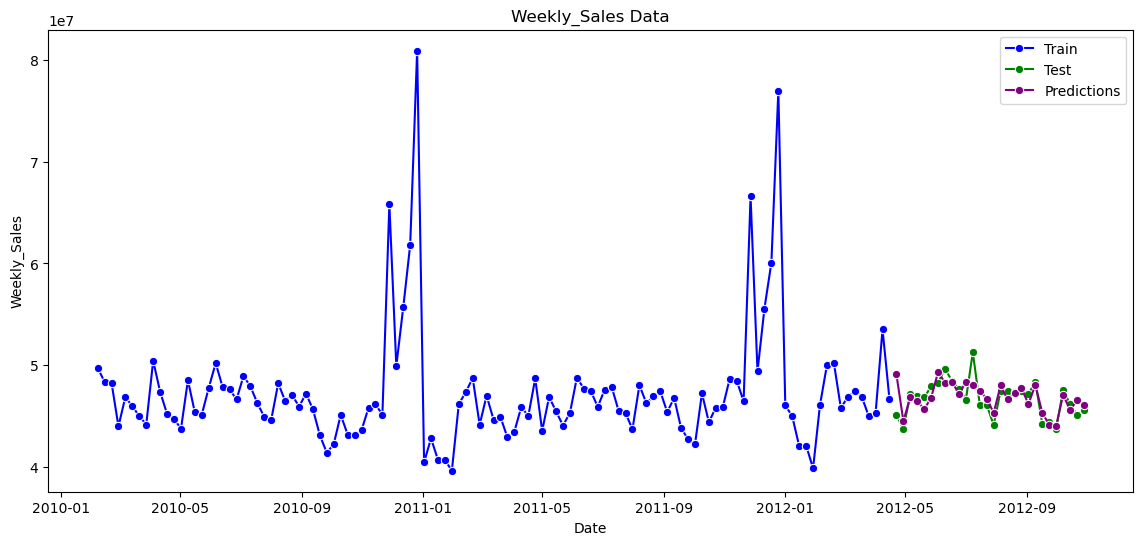

In [98]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_test, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(data=Sarima_pred, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Weekly_Sales Data');

In [99]:
# Summarize the performance of the model on the test data using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_true = df_test['Weekly_Sales'], y_pred = Sarima_pred['Weekly_Sales']))

rmse = np.round(rmse, 2)

performance_df_temp = pd.DataFrame(index = [0], data = {'Model': 'SARIMA', 'RMSE': rmse})

performance_df_temp.set_index('Model', inplace = True)

performance_df = pd.concat([performance_df, performance_df_temp])

performance_df

,RMSE
Model,
AR,1799834.98
ARIMA,1849550.37
SARIMA,1287024.58


#### Observation
The SARIMA model has the lowest RMSE (1287024.58) among the three models tested (AR, ARIMA, and SARIMA).

This suggests that the SARIMA model provides the most accurate forecasts for the underlying time series data, as a lower RMSE indicates a smaller average magnitude of the errors between the predicted values and the actual values.

In [101]:
# Define the exogenous columns
exog_cols = ['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Define the number of steps to forecast
n_steps = 12


mean_exog_values = df_train[exog_cols].mean()



# Create a DataFrame for the future exogenous data (12 rows, 5 columns)
future_exog_data = pd.DataFrame(
    # Repeat the mean values for 12 steps
    np.tile(mean_exog_values.values, (n_steps, 1)),
    columns=exog_cols
)


last_date = pd.to_datetime('2012-10-26')

# Create a future date range (e.g., Weekly_Sales means weekly frequency 'W')
future_dates = pd.date_range(start=last_date, periods=n_steps + 1, freq='W')[1:]
future_exog_data.set_index(future_dates, inplace=True)

print("Future Exogenous Data Head:")
print(future_exog_data.head())

Future Exogenous Data Head:
            Holiday_Flag  Temperature  Fuel_Price          CPI  Unemployment
2012-11-04      3.521739  2606.619043  146.899522  7674.032426    367.968348
2012-11-11      3.521739  2606.619043  146.899522  7674.032426    367.968348
2012-11-18      3.521739  2606.619043  146.899522  7674.032426    367.968348
2012-11-25      3.521739  2606.619043  146.899522  7674.032426    367.968348
2012-12-02      3.521739  2606.619043  146.899522  7674.032426    367.968348


<Axes: xlabel='Date', ylabel='Weekly_Sales'>

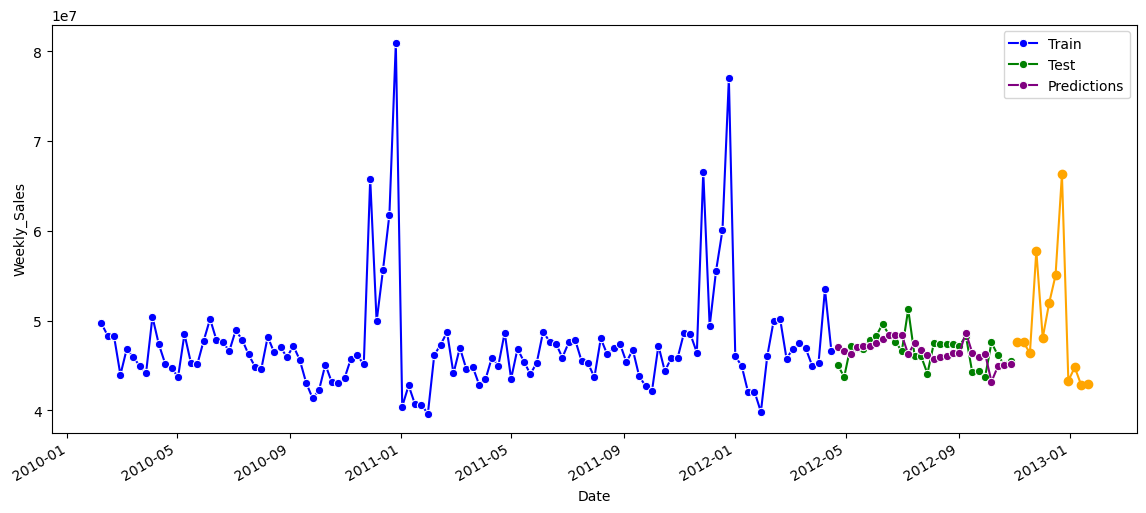

In [102]:
forecast = sarima_model.forecast(steps=12, exog=future_exog_data)
plt.figure(figsize = (14, 6))
ax = plt.gca() # Get the current Axes object for subsequent plots

# Plot the training data
sns.lineplot(data = df_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue', label = 'Train', ax=ax)

# Plot the testing data
sns.lineplot(data = df_test, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'green', label = 'Test', ax=ax)

# Plot the SARIMA predictions 
sns.lineplot(data=arima_pred, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'purple', label = 'Predictions', ax=ax)

# Plot the SARIMA future forecast
# The 'forecast' object is likely a Pandas Series, where the index is the future dates.
# We use .plot() from Pandas and pass the current axes (ax).
forecast.plot(ax=ax, marker = 'o', color = 'orange', label = 'Future Predictions')



### Weekly_Sales Prediction for Top Store for the next 12 weeks (post 26-Oct-2012)

In [104]:
df=pd.read_csv(r"D:\Shrabani.Personal\Data Science Course\Assignment\Walmart Project\Walmart DataSet.csv")


df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [105]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [107]:
df.index=df['Date']
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,,
2010-02-05,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [108]:
df.drop(columns='Date', inplace=True)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [109]:
exog_cols = ['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
n_steps = 12

In [110]:
df_top = df[df['Store'] == 20]
df_worst = df[df['Store'] == 33]

df_top.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,20,2401395.47,0,25.92,2.784,204.247194,8.187
2010-02-12,20,2109107.90,1,22.12,2.773,204.385747,8.187
2010-02-19,20,2161549.76,0,25.43,2.745,204.432100,8.187
2010-02-26,20,1898193.95,0,32.32,2.754,204.463087,8.187
2010-03-05,20,2119213.72,0,31.75,2.777,204.494073,8.187


In [111]:
df_top.shape

(143, 7)

#### For Top-store Weekly Sales: Time Series Analysis

<Axes: xlabel='Date'>

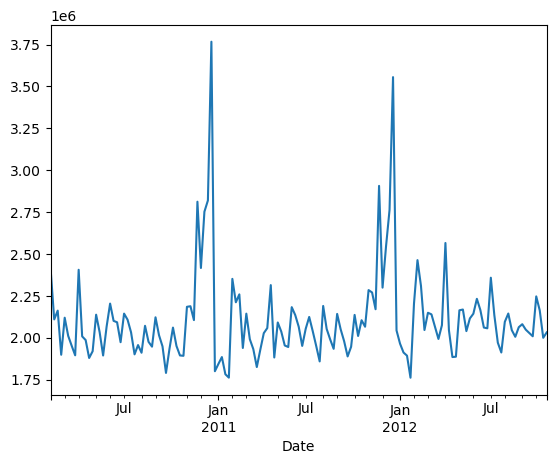

In [113]:
df_top['Weekly_Sales'].plot()



#### Stationary Analysis

In [115]:
from statsmodels.tsa.stattools import adfuller
result= adfuller(df_top['Weekly_Sales'])
result[1] ##this is the p_value of adfuller test

3.4912952838128377e-06

#### 
If the p-value is less than 0.05, then the data is Stationary, otherwise data is non-Stationary.
It is stationary data.


In [117]:
### train and test split
df_top_train =df_top[0:115]
df_top_test=df_top[115:]
df_top_train

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,20,2401395.47,0,25.92,2.784,204.247194,8.187
2010-02-12,20,2109107.90,1,22.12,2.773,204.385747,8.187
2010-02-19,20,2161549.76,0,25.43,2.745,204.432100,8.187
2010-02-26,20,1898193.95,0,32.32,2.754,204.463087,8.187
2010-03-05,20,2119213.72,0,31.75,2.777,204.494073,8.187
...,...,...,...,...,...,...,...
2012-03-16,20,2064991.71,0,53.73,3.862,214.016713,6.961
2012-03-23,20,1992436.96,0,66.11,3.900,214.090711,6.961
2012-03-30,20,2074721.74,0,51.52,3.953,214.164708,6.961


In [118]:
df_top_test

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2012-04-20,20,1884427.84,0,60.11,4.027,214.367504,7.139
2012-04-27,20,1886503.93,0,47.64,4.004,214.422306,7.139
2012-05-04,20,2163510.89,0,62.74,3.951,214.477108,7.139
2012-05-11,20,2168097.11,0,63.19,3.889,214.531910,7.139
2012-05-18,20,2039222.26,0,60.99,3.848,214.548557,7.139
2012-05-25,20,2114989.00,0,70.04,3.798,214.549942,7.139
2012-06-01,20,2143126.59,0,73.67,3.742,214.551328,7.139
2012-06-08,20,2231962.13,0,62.01,3.689,214.552713,7.139
2012-06-15,20,2165160.29,0,71.51,3.620,214.565324,7.139


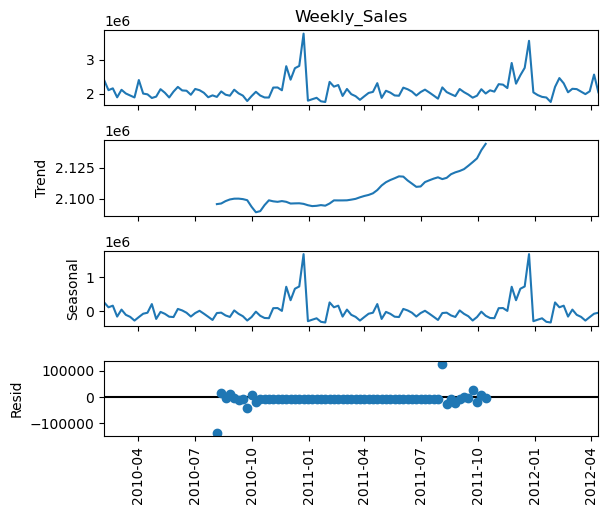

In [119]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_results = seasonal_decompose(df_top_train['Weekly_Sales'], model='additive', period=52)

decompose_results.plot()
plt.xticks(rotation=90)
plt.show()

#### Autocorrelation Plots

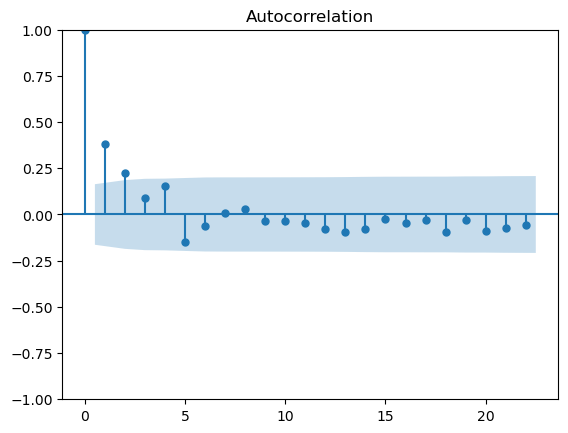

In [121]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_top['Weekly_Sales']);

#### Partial autocorrelation plot

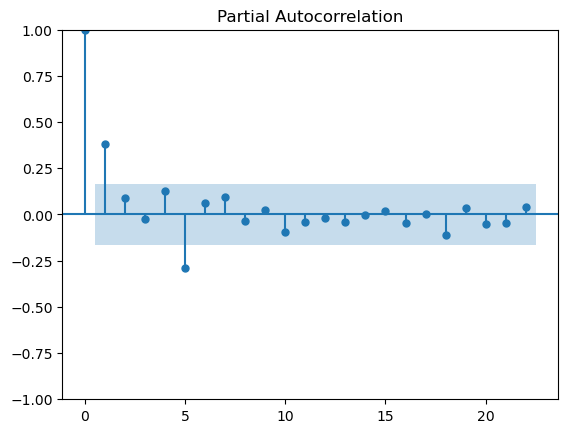

In [123]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_top['Weekly_Sales']);

#### SARIMA (Seasonal AutoRegressive Integrated Moving Average) Method

In [125]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Identify your features (exogenous variables)
exog_cols = ['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'] 

sarima_model = SARIMAX(
    df_top['Weekly_Sales'],            # Target variable
    exog=df_top[exog_cols],            # Match exogenous features to same subset
    order=(1, 0, 1),
    seasonal_order=(1, 0, 1, 52),      # 52 = yearly seasonality for weekly data
    enforce_stationarity=False,
    enforce_invertibility=False
).fit()

C:\Users\Shrabani P\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Shrabani P\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Shrabani P\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [126]:
train_len = 115

# Predict on test set (within df_top)
sarima_model_preds_top = sarima_model.predict(
    start=train_len, 
    end=len(df_top)-1,
    exog=df_top[exog_cols].iloc[train_len:]  # only if model used exogenous vars
)

sarima_model_preds_top

2012-04-20    2.237270e+06
2012-04-27    1.988218e+06
2012-05-04    2.120301e+06
2012-05-11    2.150113e+06
2012-05-18    2.090635e+06
2012-05-25    2.064507e+06
2012-06-01    2.262479e+06
2012-06-08    2.243185e+06
2012-06-15    2.160225e+06
2012-06-22    2.081494e+06
2012-06-29    2.153783e+06
2012-07-06    2.170342e+06
2012-07-13    2.178324e+06
2012-07-20    2.080362e+06
2012-07-27    1.989481e+06
2012-08-03    2.233481e+06
2012-08-10    2.094639e+06
2012-08-17    2.093798e+06
2012-08-24    2.026518e+06
2012-08-31    2.164702e+06
2012-09-07    2.079965e+06
2012-09-14    2.056668e+06
2012-09-21    1.983471e+06
2012-09-28    2.051602e+06
2012-10-05    2.110726e+06
2012-10-12    2.144607e+06
2012-10-19    2.123814e+06
2012-10-26    2.041933e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64

In [127]:
Sarima_pred_top = pd.DataFrame({
    'Date': sarima_model_preds_top.index, 
    'Weekly_Sales': sarima_model_preds_top.values  # Assuming ar_model_preds has 12 values
})
Sarima_pred_top

,Date,Weekly_Sales
0,2012-04-20,2.237270e+06
1,2012-04-27,1.988218e+06
2,2012-05-04,2.120301e+06
3,2012-05-11,2.150113e+06
4,2012-05-18,2.090635e+06
5,2012-05-25,2.064507e+06
6,2012-06-01,2.262479e+06
7,2012-06-08,2.243185e+06
8,2012-06-15,2.160225e+06
9,2012-06-22,2.081494e+06


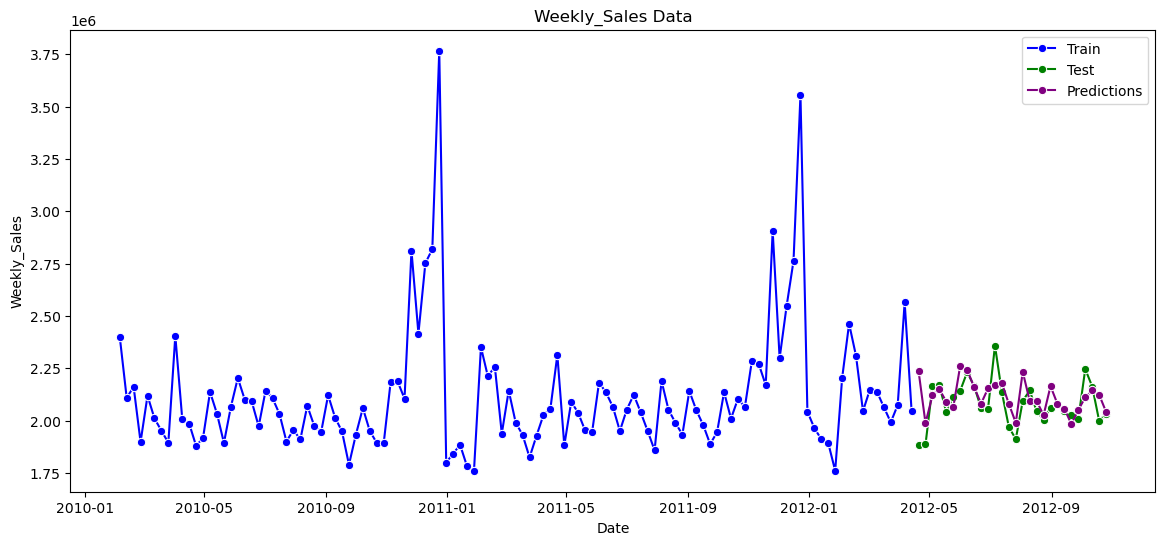

In [128]:
# Plot the time series data with the train-test split and the testing data predictions

plt.figure(figsize = (14, 6))
sns.lineplot(data = df_top_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_top_test, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(data=Sarima_pred_top, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Weekly_Sales Data')
plt.show();

In [129]:
mean_exog_values = df_top_train[exog_cols].mean()



# Create a DataFrame for the future exogenous data (12 rows, 5 columns)
future_exog_data = pd.DataFrame(
    # Repeat the mean values for 12 steps
    np.tile(mean_exog_values.values, (n_steps, 1)),
    columns=exog_cols
)


last_date = pd.to_datetime('2012-10-26')

# Create a future date range (e.g., Weekly_Sales means weekly frequency 'W')
future_dates = pd.date_range(start=last_date, periods=n_steps + 1, freq='W')[1:]
future_exog_data.set_index(future_dates, inplace=True)

print("Future Exogenous Data Head:")
print(future_exog_data.head())

Future Exogenous Data Head:
            Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
2012-11-04      0.078261    52.636435    3.323948  207.592905      7.406704
2012-11-11      0.078261    52.636435    3.323948  207.592905      7.406704
2012-11-18      0.078261    52.636435    3.323948  207.592905      7.406704
2012-11-25      0.078261    52.636435    3.323948  207.592905      7.406704
2012-12-02      0.078261    52.636435    3.323948  207.592905      7.406704


<Axes: xlabel='Date', ylabel='Weekly_Sales'>

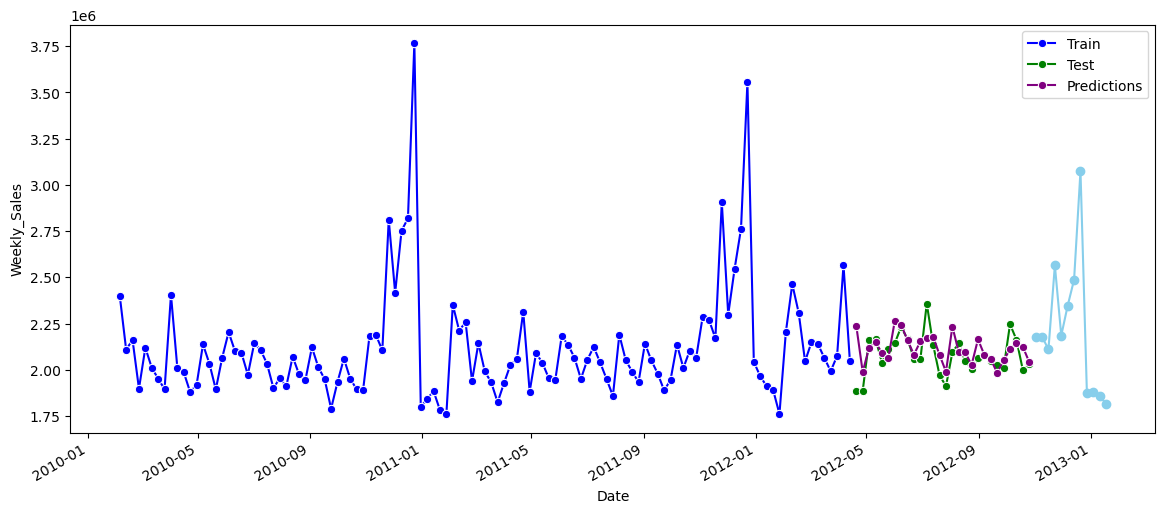

In [130]:
forecast = sarima_model.forecast(steps=12, exog=future_exog_data)
plt.figure(figsize = (14, 6))
ax = plt.gca() # Get the current Axes object for subsequent plots

# Plot the training data
sns.lineplot(data = df_top_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue', label = 'Train', ax=ax)

# Plot the testing data
sns.lineplot(data = df_top_test, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'green', label = 'Test', ax=ax)

# Plot the SARIMA predictions 
sns.lineplot(data=Sarima_pred_top, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'purple', label = 'Predictions', ax=ax)

# Plot the SARIMA future forecast
# The 'forecast' object is likely a Pandas Series, where the index is the future dates.
# We use .plot() from Pandas and pass the current axes (ax).
forecast.plot(ax=ax, marker = 'o', color = 'skyblue', label = 'Future Predictions')

### Weekly_Sales Prediction for Worst Store for the next 12 weeks (post 26-Oct-2012)

In [132]:
df_worst = df[df['Store'] == 33]
df_worst.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,33,274593.43,0,58.40,2.962,126.442065,10.115
2010-02-12,33,294882.83,1,55.47,2.828,126.496258,10.115
2010-02-19,33,296850.83,0,62.16,2.915,126.526286,10.115
2010-02-26,33,284052.77,0,56.50,2.825,126.552286,10.115
2010-03-05,33,291484.89,0,59.17,2.877,126.578286,10.115


In [133]:
df_worst.shape

(143, 7)

<Axes: xlabel='Date'>

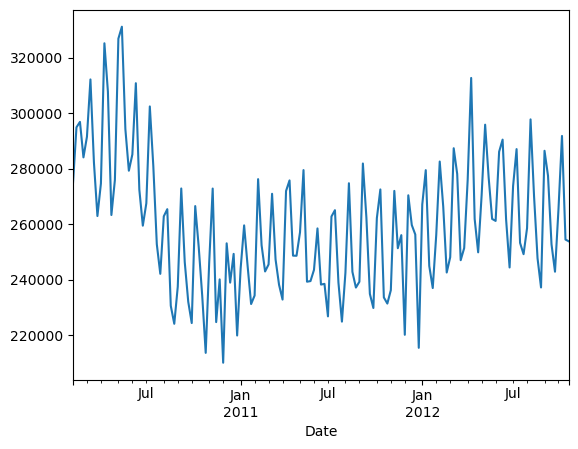

In [135]:
df_worst['Weekly_Sales'].plot()

#### Stationary Analysis

In [138]:
from statsmodels.tsa.stattools import adfuller
result= adfuller(df_worst['Weekly_Sales'])
result[1] ##this is the p_value of adfuller test

0.0008379552269735316

#### 
If the p-value is less than 0.05, then the data is Stationary, otherwise data is non-Stationary.
It is stationary data.

In [141]:
### train and test split
df_worst_train =df_top[0:115]
df_worst_test=df_top[115:]
df_worst_train

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,20,2401395.47,0,25.92,2.784,204.247194,8.187
2010-02-12,20,2109107.90,1,22.12,2.773,204.385747,8.187
2010-02-19,20,2161549.76,0,25.43,2.745,204.432100,8.187
2010-02-26,20,1898193.95,0,32.32,2.754,204.463087,8.187
2010-03-05,20,2119213.72,0,31.75,2.777,204.494073,8.187
...,...,...,...,...,...,...,...
2012-03-16,20,2064991.71,0,53.73,3.862,214.016713,6.961
2012-03-23,20,1992436.96,0,66.11,3.900,214.090711,6.961
2012-03-30,20,2074721.74,0,51.52,3.953,214.164708,6.961


In [143]:
df_worst_test

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2012-04-20,20,1884427.84,0,60.11,4.027,214.367504,7.139
2012-04-27,20,1886503.93,0,47.64,4.004,214.422306,7.139
2012-05-04,20,2163510.89,0,62.74,3.951,214.477108,7.139
2012-05-11,20,2168097.11,0,63.19,3.889,214.531910,7.139
2012-05-18,20,2039222.26,0,60.99,3.848,214.548557,7.139
2012-05-25,20,2114989.00,0,70.04,3.798,214.549942,7.139
2012-06-01,20,2143126.59,0,73.67,3.742,214.551328,7.139
2012-06-08,20,2231962.13,0,62.01,3.689,214.552713,7.139
2012-06-15,20,2165160.29,0,71.51,3.620,214.565324,7.139


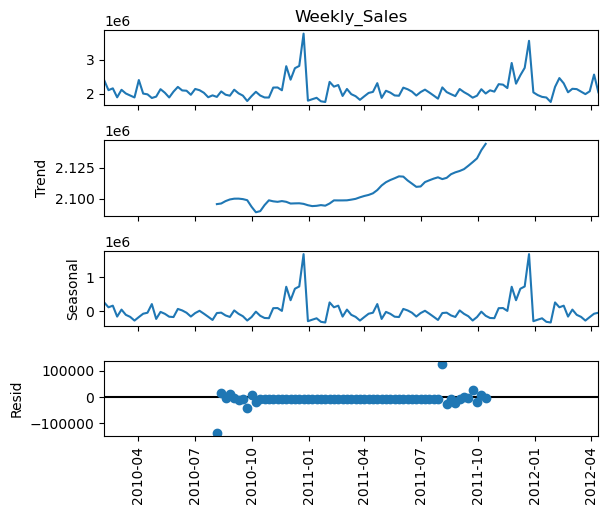

In [145]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_results = seasonal_decompose(df_worst_train['Weekly_Sales'], model='additive', period=52)

decompose_results.plot()
plt.xticks(rotation=90)
plt.show()

#### Autocorrelation Plots

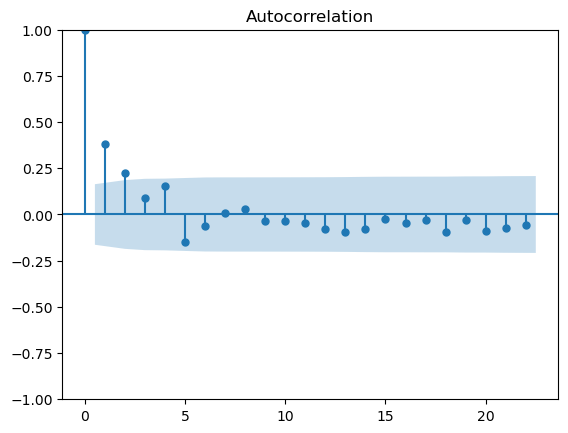

In [148]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_top['Weekly_Sales']);

#### Partial autocorrelation plot

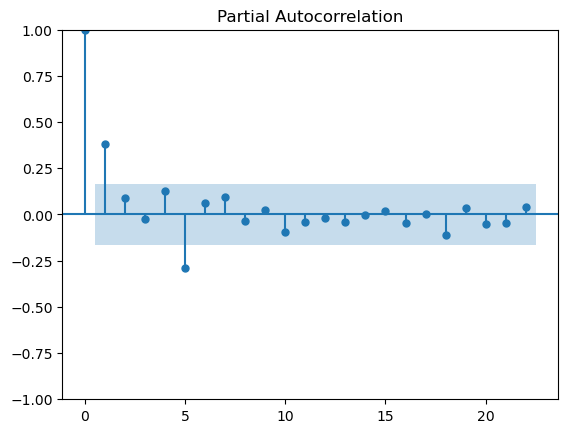

In [151]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_top['Weekly_Sales']);

### SARIMA (Seasonal AutoRegressive Integrated Moving Average) Method

In [154]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Identify your features (exogenous variables)
exog_cols = ['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'] 

sarima_model = SARIMAX(
    df_worst['Weekly_Sales'],            # Target variable
    exog=df_worst[exog_cols],            # Match exogenous features to same subset
    order=(1, 0, 1),
    seasonal_order=(1, 0, 1, 52),      # 52 = yearly seasonality for weekly data
    enforce_stationarity=False,
    enforce_invertibility=False
).fit()

C:\Users\Shrabani P\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Shrabani P\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Shrabani P\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [156]:
train_len = 115

# Predict on test set (within df_worst)
sarima_model_preds_worst = sarima_model.predict(
    start=train_len, 
    end=len(df_worst)-1,
    exog=df_worst[exog_cols].iloc[train_len:]  # only if model used exogenous vars
)

sarima_model_preds_worst

2012-04-20    265537.486423
2012-04-27    266046.995690
2012-05-04    272556.171320
2012-05-11    288479.699177
2012-05-18    258243.409033
2012-05-25    261314.308251
2012-06-01    264413.628300
2012-06-08    276627.836964
2012-06-15    260243.990743
2012-06-22    267188.607221
2012-06-29    258488.622545
2012-07-06    281884.734677
2012-07-13    279066.478681
2012-07-20    258465.855397
2012-07-27    245829.535278
2012-08-03    260966.430276
2012-08-10    284439.296219
2012-08-17    261137.009212
2012-08-24    258034.393919
2012-08-31    257766.532949
2012-09-07    287126.963114
2012-09-14    268969.357766
2012-09-21    249808.179882
2012-09-28    245713.733851
2012-10-05    273510.978815
2012-10-12    277160.821712
2012-10-19    250462.966679
2012-10-26    247523.304444
Freq: W-FRI, Name: predicted_mean, dtype: float64

In [158]:
Sarima_pred_worst = pd.DataFrame({
    'Date': sarima_model_preds_worst.index, 
    'Weekly_Sales': sarima_model_preds_worst.values  # Assuming ar_model_preds has 12 values
})
Sarima_pred_worst

,Date,Weekly_Sales
0,2012-04-20,265537.486423
1,2012-04-27,266046.995690
2,2012-05-04,272556.171320
3,2012-05-11,288479.699177
4,2012-05-18,258243.409033
5,2012-05-25,261314.308251
6,2012-06-01,264413.628300
7,2012-06-08,276627.836964
8,2012-06-15,260243.990743
9,2012-06-22,267188.607221


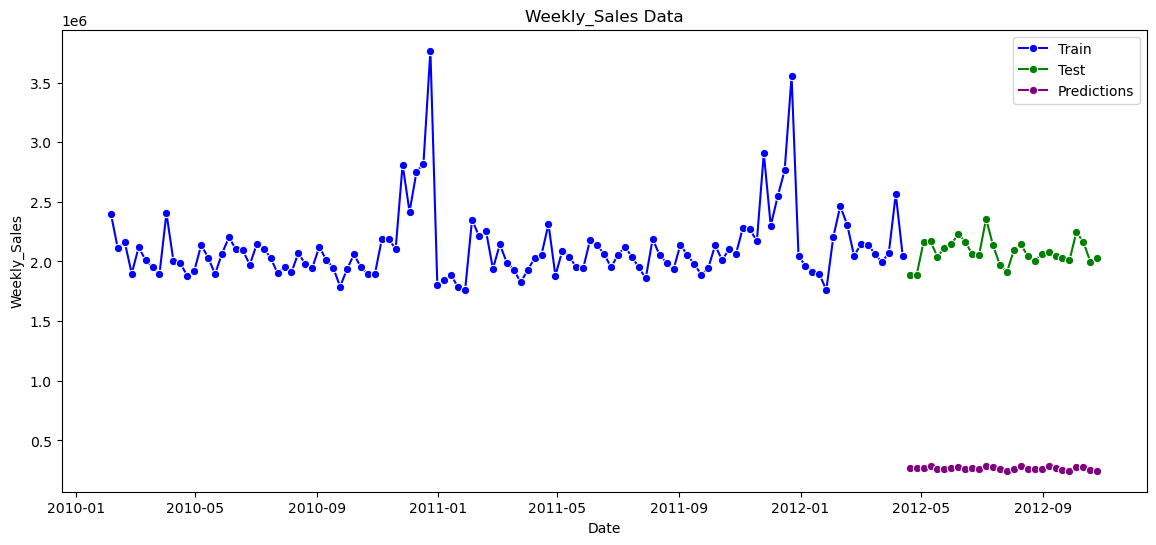

In [160]:
# Plot the time series data with the train-test split and the testing data predictions

plt.figure(figsize = (14, 6))
sns.lineplot(data = df_worst_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_worst_test, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(data=Sarima_pred_worst, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Weekly_Sales Data')
plt.show();

In [162]:
mean_exog_values = df_worst_train[exog_cols].mean()



# Create a DataFrame for the future exogenous data (12 rows, 5 columns)
future_exog_data = pd.DataFrame(
    # Repeat the mean values for 12 steps
    np.tile(mean_exog_values.values, (n_steps, 1)),
    columns=exog_cols
)


last_date = pd.to_datetime('2012-10-26')

# Create a future date range (e.g., Weekly_Sales means weekly frequency 'W')
future_dates = pd.date_range(start=last_date, periods=n_steps + 1, freq='W')[1:]
future_exog_data.set_index(future_dates, inplace=True)

print("Future Exogenous Data Head:")
print(future_exog_data.head())

Future Exogenous Data Head:
            Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
2012-11-04      0.078261    52.636435    3.323948  207.592905      7.406704
2012-11-11      0.078261    52.636435    3.323948  207.592905      7.406704
2012-11-18      0.078261    52.636435    3.323948  207.592905      7.406704
2012-11-25      0.078261    52.636435    3.323948  207.592905      7.406704
2012-12-02      0.078261    52.636435    3.323948  207.592905      7.406704


<Axes: xlabel='Date', ylabel='Weekly_Sales'>

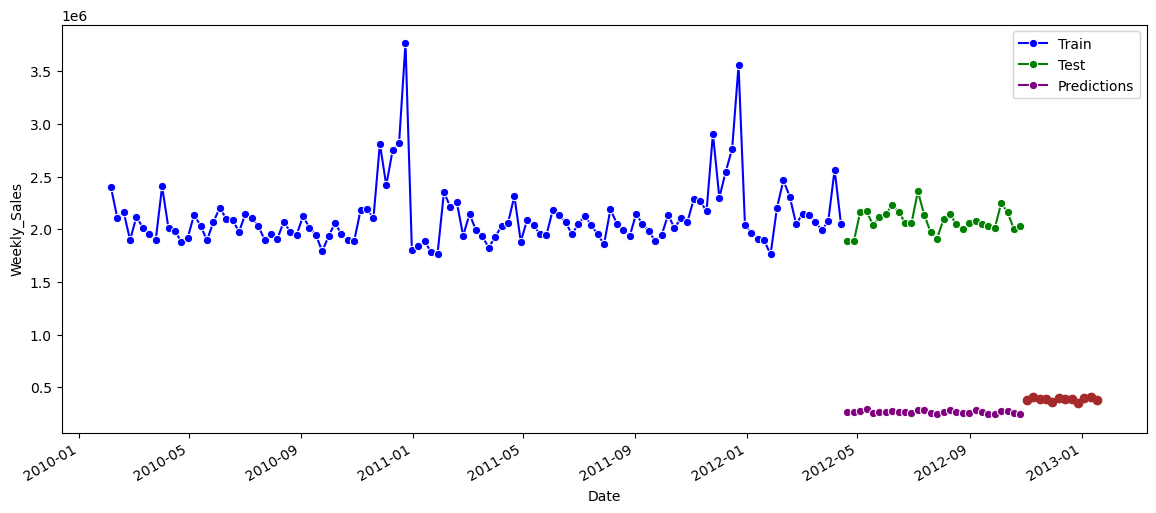

In [164]:
forecast = sarima_model.forecast(steps=12, exog=future_exog_data)
plt.figure(figsize = (14, 6))
ax = plt.gca() # Get the current Axes object for subsequent plots

# Plot the training data
sns.lineplot(data = df_worst_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue', label = 'Train', ax=ax)

# Plot the testing data
sns.lineplot(data = df_worst_test, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'green', label = 'Test', ax=ax)

# Plot the SARIMA predictions
sns.lineplot(data=Sarima_pred_worst, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'purple', label = 'Predictions', ax=ax)

# Plot the SARIMA future forecast
# The 'forecast' object is likely a Pandas Series, where the index is the future dates.
# We use .plot() from Pandas and pass the current axes (ax).
forecast.plot(ax=ax, marker = 'o', color = 'brown', label = 'Future Predictions')

### Observations from Walmart Sales Time Series Analysis

The time series analysis was conducted on data from 45 Walmart stores to study sales trends and forecast future performance. The analysis was performed at three levels:

Company-wide (aggregate) sales

Top-performing store (based on highest weekly sales)

Worst-performing store (based on lowest weekly sales)

Key Findings:

Company-wide Analysis:
The overall sales trend displayed a clear seasonal pattern, with noticeable peaks in December, likely corresponding to the festive shopping period. Future predictions for the next 12 weeks also followed this established trend, indicating the model successfully captured the seasonality and overall growth pattern.

Top-performing Store:
The forecast for the top store showed a similar trend to the company-wide pattern, with an expected increase in sales toward the end of the year. The model performed well in predicting the seasonal spikes, suggesting a good fit and reliable forecast quality for this store.

Worst-performing Store:
In contrast, the model’s forecast for the lowest-performing store was highly inconsistent and unreliable. The predictions did not follow any clear seasonal pattern and exhibited poor accuracy and quality, possibly due to low sales volume, irregular patterns, or data variability for that particular store.

Summary:
Overall, the forecasting model effectively captured the company-wide and top-store sales trends, particularly the seasonal increase during December. However, for stores with weak or irregular sales patterns, the model struggled to produce meaningful or accurate forecasts, indicating a need for further data preprocessing or model refinement for low-performing stores.